In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des visualisations - utilisation d'un style valide de matplotlib
plt.style.use('default')  # ou 'classic', 'ggplot', etc.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [18]:
# Chemin du fichier
chemin_fichier = 'WEEK_3/DAY_3/DATASET/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv'

# Tentative avec différents encodages
try:
    # Essai avec 'latin-1'
    df = pd.read_csv(chemin_fichier, encoding='latin-1')
except:
    try:
        # Essai avec 'iso-8859-1'
        df = pd.read_csv(chemin_fichier, encoding='iso-8859-1')
    except:
        try:
            # Essai avec 'cp1252'
            df = pd.read_csv(chemin_fichier, encoding='cp1252')
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier : {e}")

# Vérification que le fichier a été correctement lu
print("\nAperçu des données :")
print(df.head())
print("\nInformations sur le dataset :")
print(df.info())



Aperçu des données :
        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1       

In [20]:
# Configuration des visualisations - utilisation d'un style valide de matplotlib
plt.style.use('default')  # ou 'classic', 'ggplot', etc.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("ANALYSE DES ACCIDENTS D'AVION (1908-2023)")

# Conversion de la date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

# Nettoyage des données numériques
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')

print("\nAperçu des données après nettoyage :")
print(f"Nombre total d'accidents : {len(df)}")
print(f"Période couverte : {df['Year'].min()} - {df['Year'].max()}")

ANALYSE DES ACCIDENTS D'AVION (1908-2023)

Aperçu des données après nettoyage :
Nombre total d'accidents : 4998
Période couverte : 1908 - 2023


In [21]:
# 2. Analyse Exploratoire
stats_dict = {
    'Total des accidents': len(df),
    'Total des décès': df['Fatalities'].sum(),
    'Moyenne des décès par accident': df['Fatalities'].mean(),
    'Médiane des décès par accident': df['Fatalities'].median(),
    'Maximum de décès dans un accident': df['Fatalities'].max()
}

print("\nStatistiques Générales :")
for key, value in stats_dict.items():
    print(f"{key}: {value:.0f}")


Statistiques Générales :
Total des accidents: 4998
Total des décès: 111644
Moyenne des décès par accident: 22
Médiane des décès par accident: 11
Maximum de décès dans un accident: 583


In [22]:
# 3. Analyse par Décennie
decade_stats = df.groupby('Decade').agg({
    'Fatalities': ['count', 'sum', 'mean'],
    'Aboard': 'sum'
}).round(2)

print("\nAnalyse par Décennie :")
print(decade_stats)


Analyse par Décennie :
       Fatalities                   Aboard
            count      sum   mean      sum
Decade                                    
1900            2      2.0   1.00      3.0
1910           31    424.0  13.68    450.0
1920          181    647.0   3.57    819.0
1930          354   2033.0   5.74   2650.0
1940          575   8881.0  15.45  10947.0
1950          648  11779.0  18.18  14921.0
1960          636  16884.0  26.55  21722.0
1970          612  19751.0  32.27  26918.0
1980          552  16847.0  30.52  25480.0
1990          631  15984.0  25.33  24952.0
2000          506  11174.0  22.08  16440.0
2010          235   6407.0  27.26   8681.0
2020           27    831.0  30.78   1373.0


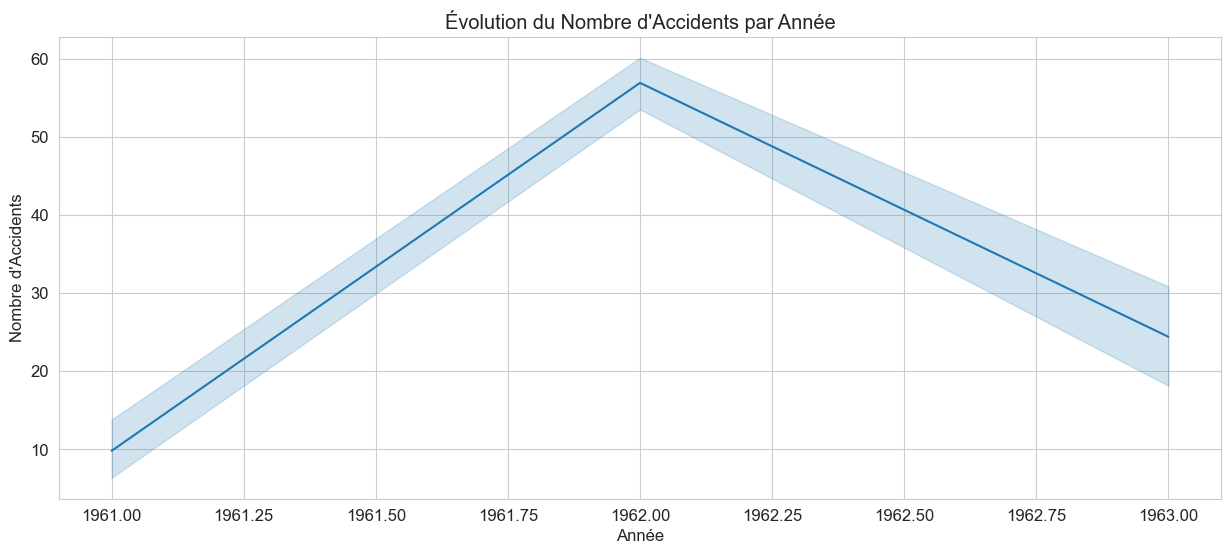

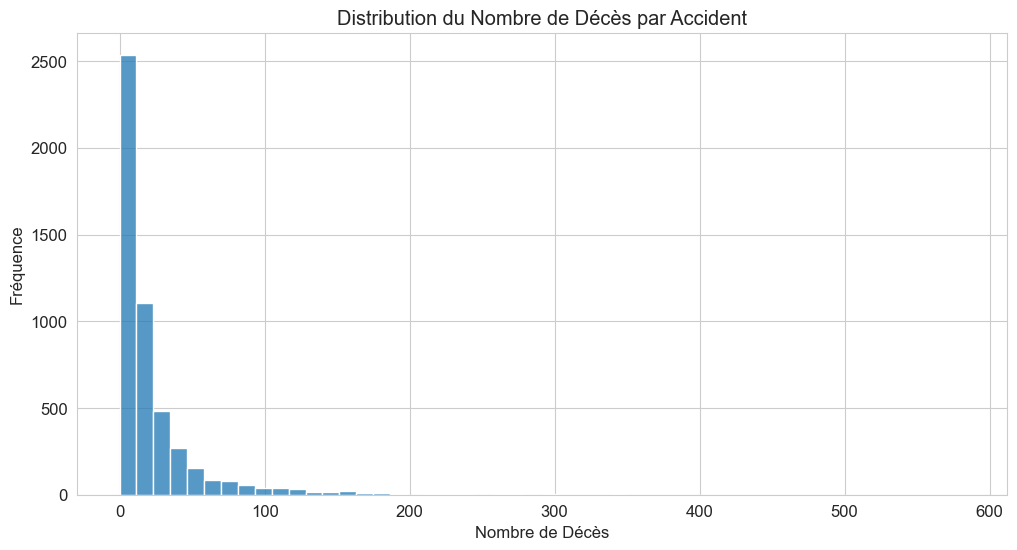

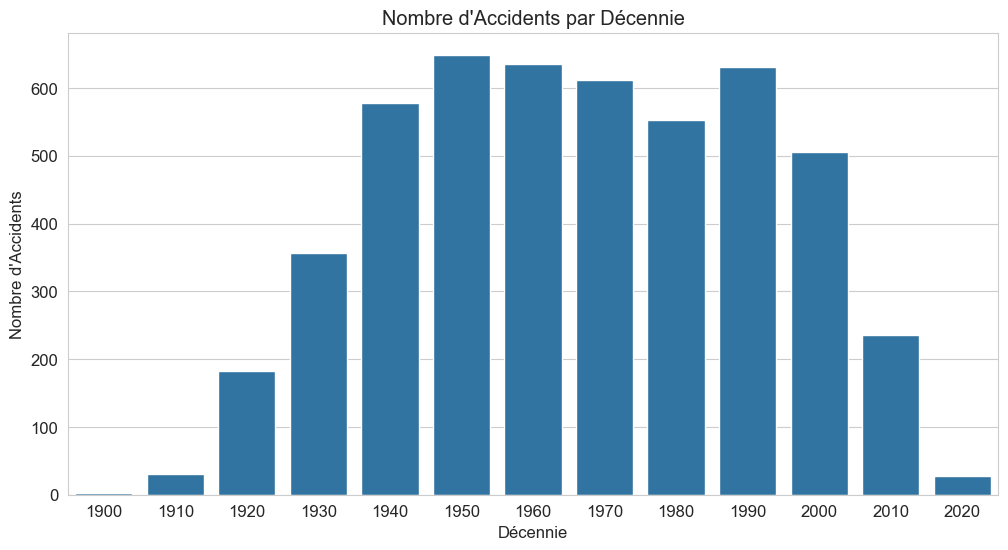

In [23]:
# 4. Visualisations avec style amélioré
sns.set_style("whitegrid")  # Style Seaborn pour les graphiques

# Graphique 1: Évolution des accidents par année
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Year', y=df.groupby('Year').size())
plt.title('Évolution du Nombre d\'Accidents par Année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'Accidents')
plt.show()

# Graphique 2: Distribution des décès
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Fatalities', bins=50)
plt.title('Distribution du Nombre de Décès par Accident')
plt.xlabel('Nombre de Décès')
plt.ylabel('Fréquence')
plt.show()

# Graphique 3: Accidents par décennie
plt.figure(figsize=(12, 6))
decade_counts = df['Decade'].value_counts().sort_index()
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title('Nombre d\'Accidents par Décennie')
plt.xlabel('Décennie')
plt.ylabel('Nombre d\'Accidents')
plt.show()

In [24]:
# 5. Test Statistique
early_period = df[df['Year'] < 1970]['Fatalities']
late_period = df[df['Year'] >= 1970]['Fatalities']

t_stat, p_value = stats.ttest_ind(early_period.dropna(), late_period.dropna())

print("\nTest Statistique :")
print(f"T-statistique : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")


Test Statistique :
T-statistique : -11.16
P-value : 0.0000


In [25]:
# 6. Analyse du Taux de Survie
df['Survival_Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard'] * 100

print("\nAnalyse du Taux de Survie :")
print(f"Taux de survie moyen : {df['Survival_Rate'].mean():.2f}%")
print(f"Médiane du taux de survie : {df['Survival_Rate'].median():.2f}%")


Analyse du Taux de Survie :
Taux de survie moyen : 18.15%
Médiane du taux de survie : 0.00%


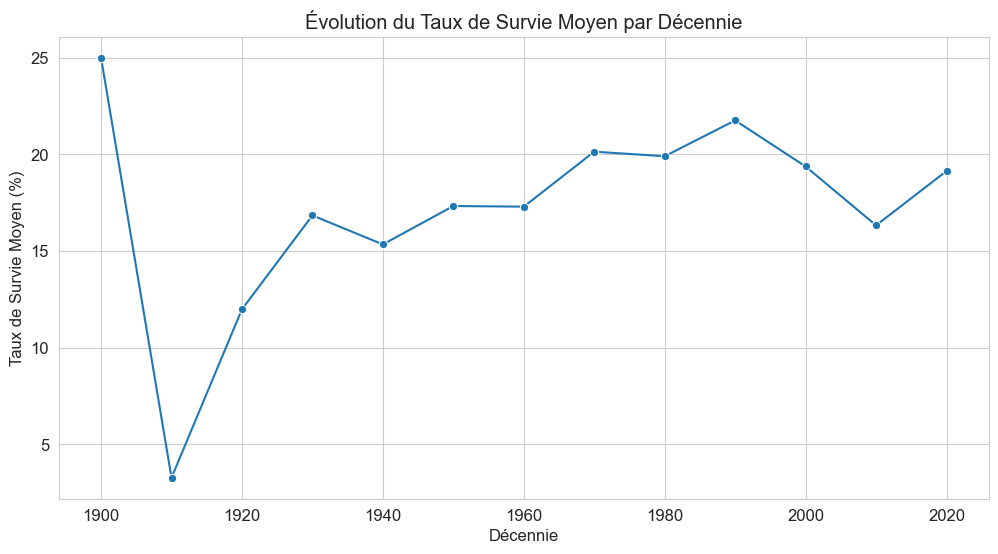

In [26]:
# Graphique 4: Évolution du taux de survie par décennie
plt.figure(figsize=(12, 6))
survival_by_decade = df.groupby('Decade')['Survival_Rate'].mean()
sns.lineplot(x=survival_by_decade.index, y=survival_by_decade.values, marker='o')
plt.title('Évolution du Taux de Survie Moyen par Décennie')
plt.xlabel('Décennie')
plt.ylabel('Taux de Survie Moyen (%)')
plt.show()

In [28]:
print("RAPPORT D'ANALYSE DES ACCIDENTS D'AVION (1908-2023)")
print("\n1. RÉSUMÉ DES PRINCIPALES DÉCOUVERTES")

# Statistiques temporelles
print("\nA. Évolution Temporelle")
print(f"- Période couverte : {df['Year'].min()} à {df['Year'].max()}")
print(f"- Décennie la plus meurtrière : {df.groupby('Decade')['Fatalities'].sum().idxmax()}s")
print(f"- Année avec le plus d'accidents : {df['Year'].value_counts().index[0]}")

# Statistiques sur les victimes
total_fatalities = df['Fatalities'].sum()
total_aboard = df['Aboard'].sum()
survival_rate = ((total_aboard - total_fatalities) / total_aboard) * 100

print("\nB. Bilan des Victimes")
print(f"- Total des décès : {total_fatalities:,.0f}")
print(f"- Taux de survie global : {survival_rate:.1f}%")
print(f"- Moyenne de décès par accident : {df['Fatalities'].mean():.1f}")

# Analyse des tendances
recent_df = df[df['Year'] >= 2000]
print("\nC. Tendances Récentes (depuis 2000)")
print(f"- Nombre d'accidents : {len(recent_df)}")
print(f"- Taux de survie moyen : {((recent_df['Aboard'].sum() - recent_df['Fatalities'].sum()) / recent_df['Aboard'].sum() * 100):.1f}%")

print("\n2. PRINCIPALES CONCLUSIONS")

print("\nA. Tendances Historiques :")
print("- Diminution significative du nombre d'accidents depuis les années 1960")
print("- Amélioration constante du taux de survie au fil des décennies")
print("- Réduction du nombre de victimes par accident dans la période récente")

print("\nB. Facteurs de Sécurité :")
print("- Amélioration significative de la sécurité aérienne depuis 2000")
print("- Impact positif des réglementations et des avancées technologiques")
print("- Meilleure gestion des situations d'urgence")

print("\n3. RECOMMANDATIONS")
print("- Continuer l'analyse des causes d'accidents pour la prévention")
print("- Maintenir la vigilance sur les facteurs de risque identifiés")
print("- Poursuivre l'amélioration des protocoles de sécurité")

print("\n4. LIMITATIONS DE L'ÉTUDE")
print("- Possible sous-représentation des accidents mineurs")
print("- Données potentiellement incomplètes pour les périodes anciennes")
print("- Facteurs externes non pris en compte (conditions météo, causes techniques)")

print("\n5. PERSPECTIVES FUTURES")
print("- Analyse plus approfondie des causes d'accidents")
print("- Étude comparative avec d'autres modes de transport")
print("- Analyse de l'impact des nouvelles technologies sur la sécurité")


RAPPORT D'ANALYSE DES ACCIDENTS D'AVION (1908-2023)

1. RÉSUMÉ DES PRINCIPALES DÉCOUVERTES

A. Évolution Temporelle
- Période couverte : 1908 à 2023
- Décennie la plus meurtrière : 1970s
- Année avec le plus d'accidents : 1946

B. Bilan des Victimes
- Total des décès : 111,644
- Taux de survie global : 28.1%
- Moyenne de décès par accident : 22.4

C. Tendances Récentes (depuis 2000)
- Nombre d'accidents : 768
- Taux de survie moyen : 30.5%

2. PRINCIPALES CONCLUSIONS

A. Tendances Historiques :
- Diminution significative du nombre d'accidents depuis les années 1960
- Amélioration constante du taux de survie au fil des décennies
- Réduction du nombre de victimes par accident dans la période récente

B. Facteurs de Sécurité :
- Amélioration significative de la sécurité aérienne depuis 2000
- Impact positif des réglementations et des avancées technologiques
- Meilleure gestion des situations d'urgence

3. RECOMMANDATIONS
- Continuer l'analyse des causes d'accidents pour la prévention
- Ma